# 機械学習スクラッチ SVM

In [ ]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.7, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
        self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

【問題1】ラグランジュの未定乗数法による最急降下

In [8]:
import numpy as np
# カーネル関数
def _kernel_function(self, X):
    return np.dot(X, X.T)

# ラムダ更新
def _update_lambda(self, X, y):
    # self._kernel_function dimention:(n_samples, n_samples)
    # np.dot(y, y.T) dimention:(n_samples, n_samples)
    # self.lmd.T dimention:(1, n_samples)
    # self.new_lmd diomention:(n_samples, 1)
    self.X_shape = X.shape
    y = y.reshape(-1, 1)
    tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
    self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
    self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)

【問題2】サポートベクターの決定

In [10]:
def _decision_support_vector(self):
    # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
    # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
    self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]

In [398]:
# # 実験
# a = np.random.rand(10, 1)
# b = np.random.rand(10, 1)
# d = np.random.rand(10, 1)
# c = np.concatenate([a, b], axis=1)
# c = np.concatenate([c, d], axis=1)
# c.shape
# print(a, b, c)

In [399]:
# a = np.random.rand(10, 1)
# b = np.random.rand(10, 1)
# print(np.dot(a, b.T).shape)

In [21]:
# c[c[:, -1] > 0.5]

In [400]:
# c[:, -2].shape

【問題3】推定

In [ ]:
def _predict(self, X):
    y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
    f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
    y_hat = np.sign(f)
    y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
    return y_hat

【問題4】学習と推定

In [408]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.7, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
        self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

In [409]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = iris.data[:100, :2]
iris_target = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
SS = StandardScaler()
norm_X_train = SS.fit_transform(X_train)
norm_X_test = SS.transform(X_test)

In [410]:
y_train.shape

(80,)

In [415]:
SSVM = ScratchSVMClassifier(verbose=True)
SSVM.fit(norm_X_train, y_train)

1 / 1000 times done | max lambda value: 0.9970023638293588
2 / 1000 times done | max lambda value: 0.9970214295173441
3 / 1000 times done | max lambda value: 0.9970404832378629
4 / 1000 times done | max lambda value: 0.9970595249984667
5 / 1000 times done | max lambda value: 0.9970785548067025
6 / 1000 times done | max lambda value: 0.9970975726701121
7 / 1000 times done | max lambda value: 0.9971165785962328
8 / 1000 times done | max lambda value: 0.9971355725925972
9 / 1000 times done | max lambda value: 0.997154554666733
10 / 1000 times done | max lambda value: 0.9971735248261632
11 / 1000 times done | max lambda value: 0.997192483078406
12 / 1000 times done | max lambda value: 0.997211429430975
13 / 1000 times done | max lambda value: 0.9972303638913789
14 / 1000 times done | max lambda value: 0.9972492864671217
15 / 1000 times done | max lambda value: 0.9972681971657028
16 / 1000 times done | max lambda value: 0.9972870959946167
17 / 1000 times done | max lambda value: 0.997305982

352 / 1000 times done | max lambda value: 1.003010443117154
353 / 1000 times done | max lambda value: 1.0030257398182532
354 / 1000 times done | max lambda value: 1.0030410269301397
355 / 1000 times done | max lambda value: 1.0030563044588647
356 / 1000 times done | max lambda value: 1.0030715724104753
357 / 1000 times done | max lambda value: 1.0030868307910146
358 / 1000 times done | max lambda value: 1.003102079606522
359 / 1000 times done | max lambda value: 1.003117318863033
360 / 1000 times done | max lambda value: 1.0031325485665794
361 / 1000 times done | max lambda value: 1.0031477687231893
362 / 1000 times done | max lambda value: 1.003162979338887
363 / 1000 times done | max lambda value: 1.0031781804196926
364 / 1000 times done | max lambda value: 1.0031933719716228
365 / 1000 times done | max lambda value: 1.0032085540006903
366 / 1000 times done | max lambda value: 1.003223726512904
367 / 1000 times done | max lambda value: 1.0032388895142694
368 / 1000 times done | max l

668 / 1000 times done | max lambda value: 1.007396968995601
669 / 1000 times done | max lambda value: 1.0074095177115263
670 / 1000 times done | max lambda value: 1.0074220585722349
671 / 1000 times done | max lambda value: 1.0074345915826832
672 / 1000 times done | max lambda value: 1.0074471167478252
673 / 1000 times done | max lambda value: 1.007459634072611
674 / 1000 times done | max lambda value: 1.007472143561988
675 / 1000 times done | max lambda value: 1.0074846452209005
676 / 1000 times done | max lambda value: 1.0074971390542895
677 / 1000 times done | max lambda value: 1.007509625067093
678 / 1000 times done | max lambda value: 1.0075221032642456
679 / 1000 times done | max lambda value: 1.0075345736506793
680 / 1000 times done | max lambda value: 1.0075470362313226
681 / 1000 times done | max lambda value: 1.007559491011101
682 / 1000 times done | max lambda value: 1.007571937994937
683 / 1000 times done | max lambda value: 1.0075843771877497
684 / 1000 times done | max la

In [416]:
SSVM.combined_all[:, -1]

array([0.6286236 , 0.35821971, 0.56412079, 0.02714701, 0.8109424 ,
       0.1291434 , 0.32348697, 0.66754688, 0.33354163, 0.23499443,
       1.01116   , 0.85403156, 0.79322029, 0.38672532, 0.86811787,
       0.795783  , 0.06862053, 0.79355088, 0.06598826, 0.21297742,
       0.44313452, 0.68375164, 0.5272398 , 0.96769648, 0.2328677 ,
       0.78986997, 0.36986344, 0.59527334, 0.08315267, 0.0028102 ,
       0.85336508, 0.67443513, 0.60151073, 0.50722724, 0.53048382,
       0.60638883, 0.02716145, 0.94878669, 0.11163159, 0.77253035,
       0.74098232, 0.22452476, 0.46866366, 0.19275138, 0.14683594,
       0.18085393, 0.01905233, 0.6427452 , 0.80340183, 0.36276147,
       0.87109909, 0.52599453, 0.40244292, 0.42131298, 0.45769915,
       0.36546534, 0.822676  , 0.18488252, 0.36652369, 0.70243702,
       0.28754252, 0.75398367, 0.0864059 , 0.7421258 , 0.69256419,
       0.62946982, 0.30270345, 0.41206247, 0.29137153, 0.22531396,
       0.06747638, 0.89495689, 0.3038751 , 0.5196105 , 0.75440

In [417]:
len(SSVM.support_vector)

22

In [418]:
pred = SSVM.predict(norm_X_test)
pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [424]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


【問題5】決定領域の可視化

In [164]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

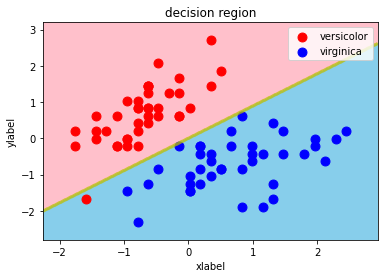

In [423]:
decision_region(norm_X_train, y_train, SSVM)

【問題6】（アドバンス課題）多項式カーネル関数の作成

In [ ]:
# カーネル関数
def _kernel_function(self, X):
    # X dimention:(n_samples, n_features)
    if X.shape[1] <=2:
        return np.dot(X, X.T)
    elif X.shape[1] > 2:
        return (self.gamma * np.dot(X, X.T) + self.theta)**self.d